In [1]:
import numpy as np
import scipy
import sklearn
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture,BayesianGaussianMixture

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['image.cmap'] = 'Greys'

import seaborn as sns

import sys,os,pdb,copy,pickle
from importlib import reload
# import pynapple as nap

sys.path.append('/mnt/home/szheng/projects/seq_detection2/code')
sys.path.append('/mnt/home/szheng/projects/util_code')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis/scripts')
sys.path.append('/mnt/home/szheng/projects/cluster_spikes')
sys.path.append('/mnt/home/szheng/projects/place_variability/code')
import data_prep_new as dpn
import place_cell_analysis as pa
import plot_helper as ph
import preprocess as prep
import nmf_analysis as na
import nmf_plot as nmfp
reload(na)

import raster_new as rn
import data_prep_pyn as dpp


import change_point_analysis as cpa
import change_point_plot as cpp

import place_field_analysis as pf

import switch_analysis_one_session as saos
reload(saos)

import process_central_arm as pca 
import change_point_analysis_central_arm_seperate as cpacas

import misc
reload(misc)
from misc import get_nth_key, get_nth_val

67 sessions!
67 sessions!


In [2]:
figdir = '/mnt/home/szheng/ceph/place_variability/fig/paper/figure2'

In [3]:
import database
db = database.db

In [4]:
subdb = db.query('owner=="roman"').sort_values('n_pyr_putative',ascending=False)
subdb = subdb.query('ntrials>=20&n_neurons>=50')

In [5]:
import pf_recombine_central as pfrc
import fr_map_one_session as fmos
import switch_detection_one_session as sdos
import get_all_switch_add_metrics as gasam

/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [6]:
import preprocess_one_session as prepos

In [7]:
%%time
all_fields_recombined_all = {}
pf_params_recombined_all = {}
fr_map_trial_df_all = {}
pval_all = {}
best_n_all = {}
X_pwc_all = {}
X_raw_all = {}
changes_df_all = {}
var_res_all = {}
corr_all = {}
all_sw_d_all = {}
all_sw_with_metrics_d_all = {}
trial_index_to_index_within_df_all = {}

spk_beh_df_all = {}

for ind,row in subdb.iterrows():
    data_dir_full = row['data_dir_full']
    ani = ind[0]
    sess = row['sess_name']
    
    res=dpp.load_spk_beh_df(data_dir_full,load_only=True)
    if res is not None:
        spk_beh_df = res['spk_beh_df']
        spk_beh_df,_ = dpp.add_lin_binned(spk_beh_df,bin_size=2.2,nbins=None)
        spk_beh_df_all[ani,sess] = spk_beh_df
        trial_index_to_index_within_df = dpp.trial_index_to_index_within_trialtype(spk_beh_df)
        trial_index_to_index_within_df_all[ani,sess] = trial_index_to_index_within_df
        

    pf_res_recombine = pfrc.main(data_dir_full,force_reload=False,load_only=True)

    all_fields_recombined=pf_res_recombine['all_fields_recombined']
    all_fields_recombined_all[ani,sess] = all_fields_recombined
    pf_params_recombined = pf_res_recombine['params_recombined']
    pf_params_recombined_all[ani,sess] = pf_params_recombined

    fr_map_all = fmos.main(data_dir_full,force_reload=False,load_only=True)
    fr_map_trial_df = fr_map_all['fr_map_trial_df']
    fr_map_trial_df_all[ani,sess] = fr_map_trial_df



    sw_res = sdos.main(data_dir_full,force_reload=False,load_only=True)
    pval = sw_res['pval']
    pval_all[ani,sess]=pval
    best_n = sw_res['best_n']
    best_n_all[ani,sess] = best_n
    X_pwc = sw_res['X_pwc']
    X_pwc_all[ani,sess] = X_pwc
    X_raw = sw_res['X_raw']
    X_raw_all[ani,sess]=X_raw
    changes_df = sw_res['changes_df']
    changes_df_all[ani,sess] = changes_df
    var_res = sw_res['var_res']
    var_res_all[ani,sess]=var_res
    corr = sw_res['corr']
    corr_all[ani,sess] = corr

    sw_info_res=gasam.main(data_dir_full,force_reload=False,load_only=True)
    if sw_info_res is None:
        sw_info_res=gasam.main(data_dir_full,force_reload=True,load_only=False)
    all_sw_d = sw_info_res['all_sw_d']
    all_sw_d_all[ani,sess] = all_sw_d
    all_sw_with_metrics_d = sw_info_res['all_sw_with_metrics_d']
    all_sw_with_metrics_d_all[ani,sess] = all_sw_with_metrics_d

all_fields_recombined_all = pd.concat(all_fields_recombined_all,axis=0)
pf_params_recombined_all = pd.concat(pf_params_recombined_all,axis=0)
fr_map_trial_df_all = pd.concat(fr_map_trial_df_all,axis=0)
pval_all = pd.concat(pval_all,axis=0)
X_pwc_all = pd.concat(X_pwc_all,axis=0)
X_raw_all = pd.concat(X_raw_all,axis=0)
changes_df_all = pd.concat(changes_df_all,axis=0)
var_res_all = pd.concat(var_res_all,axis=0)
corr_all = pd.concat(corr_all,axis=0)
all_sw_d_all = pd.concat(all_sw_d_all,axis=0)
all_sw_with_metrics_d_all = pd.concat(all_sw_with_metrics_d_all,axis=0)
best_n_all = pd.concat(best_n_all,axis=0)

spk_beh_df_all = pd.concat(spk_beh_df_all,axis=0)


/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/place_field_afterheadscan_recombine.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/fr_map.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/sw_res_afterheadscan.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/switch_analysis/all_sw_info.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/py_data/place_field_afterheadscan_recombine.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/py_data/fr_map.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/py_data/sw_res_afterheadscan.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/py_data/switch_analysis/all_sw_info.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220118

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210302/py_data/place_field_afterheadscan_recombine.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210302/py_data/fr_map.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210302/py_data/sw_res_afterheadscan.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210302/py_data/switch_analysis/all_sw_info.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210317/py_data/place_field_afterheadscan_recombine.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210317/py_data/fr_map.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210317/py_data/sw_res_afterheadscan.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210317/py_data/switch_analysis/all_sw_info.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210312

/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_200919/py_data/place_field_afterheadscan_recombine.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_200919/py_data/fr_map.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_200919/py_data/sw_res_afterheadscan.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_200919/py_data/switch_analysis/all_sw_info.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m3/e14_2m3_201208/py_data/place_field_afterheadscan_recombine.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m3/e14_2m3_201208/py_data/fr_map.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m3/e14_2m3_201208/py_data/sw_res_afterheadscan.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m3/e14_2m3_201208/py_data/switch_analysis/all_sw_info.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m3/e14_2m3_201206/py_data/place_fie

In [8]:
import statannotations

# prep 

In [9]:
# beh_var_l = ['task_index','trial_type','trial','time','lin','lin_binned','speed_gauss','v_gauss','off_track_event','pause_event','directed_locomotion']

# beh_df_all = spk_beh_df_all[beh_var_l]

# beh_df_all_fam = beh_df_all.query('task_index==0')

# def get_categorical_var(df,var_bin_d):
#     for k,val in var_bin_d.items():
#         k_cat = k+'_cat'
#         df[k_cat] = pd.cut(df[k],val,retbins=False,labels=False,include_lowest=True)
#     return df

# var_bin_d = {'speed_gauss':[0,1,5,10,20],'lin':[0,15,44.5,74,92.5,111,148,185,202,222]}
# beh_df_all_fam = get_categorical_var(beh_df_all_fam,var_bin_d)

# # not moving part, all asign to category 0
# beh_df_all_fam.loc[~beh_df_all_fam['directed_locomotion'].astype(bool),'speed_gauss_cat'] = 0

# # only keep the running
# beh_df_all_fam = beh_df_all_fam.loc[beh_df_all_fam['directed_locomotion'].astype(bool)]

# # update lin cat, combine two home region
# beh_df_all_fam.loc[beh_df_all_fam['lin_cat']==beh_df_all_fam['lin_cat'].max(),'lin_cat'] = 0



# ind_var_per_trial_pos_all=beh_df_all_fam.groupby(level=(0,1)).apply(lambda x:x.groupby(['task_index','trial','lin_cat']).agg({'speed_gauss':'mean'}))





# # get time bin and time per trial and pos!!!!
# n_timebin_per_trial_pos_all = beh_df_all_fam.groupby(level=(0,1)).apply(lambda x:x.groupby(['task_index','trial','lin_cat']).count().iloc[:,0])
# dt_per_ani_sess_task =beh_df_all.set_index('task_index',append=True).groupby(level=(0,1,3)).apply(lambda x:np.median(np.diff(x['time'])))
# time_per_trial_pos_all = n_timebin_per_trial_pos_all.groupby(level=(0,1,2)).apply(lambda x:x * dt_per_ani_sess_task.loc[x.name])



# ind_var_per_trial_pos_all['occupancy'] = time_per_trial_pos_all

# # get n fields per pos!!!
# pos_key = 'peak'
# n_field_per_ani_sess_task_pos = all_fields_recombined_all.groupby(level=(0,1,2)).apply(lambda x:x[pos_key].astype(int).value_counts(sort=False).sort_index(level=3)) # assuming pos_key column is int

# n_field_per_ani_sess_task_pos = pd.DataFrame(n_field_per_ani_sess_task_pos.values,index=n_field_per_ani_sess_task_pos.index,columns=['n_field'])


# n_field_per_ani_sess_task_pos = n_field_per_ani_sess_task_pos.reset_index(level=3).rename({'level_3':'lin_binned'},axis=1)



# # categorize vars
# lin_bin_d = {'lin_binned':np.array([0,15,44.5,74,92.5,111,148,185,202,222])/2.2}
# n_field_per_ani_sess_task_pos = get_categorical_var(n_field_per_ani_sess_task_pos,lin_bin_d)

# n_field_per_ani_sess_task_pos.loc[n_field_per_ani_sess_task_pos['lin_binned_cat']==n_field_per_ani_sess_task_pos['lin_binned_cat'].max(),'lin_binned_cat'] = 0
# n_field_per_ani_sess_task_pos = n_field_per_ani_sess_task_pos.set_index('lin_binned_cat',append=True)


# n_field_per_ani_sess_task_pos = n_field_per_ani_sess_task_pos.groupby(level=(0,1,2,3))['n_field'].sum()

# gpb=ind_var_per_trial_pos_all.groupby(level=(0,1,2,3))
# n_field_d = {}
# for k,val in gpb:
#     ani,sess,task,tr=k
#     n_field_d[k] = n_field_per_ani_sess_task_pos.loc[ani,sess,task]
# n_field_d=pd.concat(n_field_d)

# ind_var_per_trial_pos_all['n_field'] = n_field_d

# all_sw_d_all_copy = copy.copy(all_sw_d_all)
# all_sw_d_all_copy['lin_binned'] = all_sw_d_all_copy['field_pos']
# all_sw_d_all_copy=get_categorical_var(all_sw_d_all_copy,lin_bin_d)
# get_sw_per_trial_pos_func = lambda x:x.groupby(['switch','trial_index','lin_binned_cat']).count().iloc[:,0]
# sw_per_trial_pos_all = all_sw_d_all_copy.groupby(level=(0,1,2)).apply(get_sw_per_trial_pos_func)


# onoff_str_d={1:'on',-1:'off'}
# for onoff in [1,-1]:
#     sw_per_trial_pos_all_onoff=sw_per_trial_pos_all.loc[(slice(None),slice(None),slice(None),onoff)]
#     onoff_str = onoff_str_d[onoff]
#     ind_var_per_trial_pos_all[f'sw_{onoff_str}'] = sw_per_trial_pos_all_onoff
#     ind_var_per_trial_pos_all[f'sw_{onoff_str}'] = ind_var_per_trial_pos_all[f'sw_{onoff_str}'].fillna(0)

# var_per_trial_pos_all = ind_var_per_trial_pos_all

/tmp/ipykernel_862392/1198080538.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[k_cat] = pd.cut(df[k],val,retbins=False,labels=False,include_lowest=True)
/tmp/ipykernel_862392/1198080538.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[k_cat] = pd.cut(df[k],val,retbins=False,labels=False,include_lowest=True)


In [22]:
import behavior_and_switching as bas
reload(bas)
# var_per_trial_pos_all = bas.prep_regression(spk_beh_df_all,all_fields_recombined_all,all_sw_d_all,var_bin_d={'lin_binned':np.array([0,15,74,111,185,202,222])/2.2})
var_per_trial_pos_all = bas.prep_regression(spk_beh_df_all,all_fields_recombined_all,all_sw_d_all)



/mnt/home/szheng/projects/place_variability/code/behavior_and_switching.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[k_cat] = pd.cut(df[k],val,retbins=False,labels=False,include_lowest=True)


In [23]:
from sklearn.model_selection import KFold,cross_val_score,StratifiedShuffleSplit
import statsmodels.formula.api as smf
import statsmodels.api as sm
from patsy import dmatrices

In [ ]:
# y_key = 'sw_on'
# formula = f"{y_key}~C(lin_binned_cat)+n_field+trial+speed_gauss"

# X = var_per_trial_pos_all
# model=smf.glm(formula=formula,data=X,family=sm.families.Poisson(sm.families.links.Log()))
# res=model.fit()

# 
# endog,exog=dmatrices(formula,data=X)
# endog = np.squeeze(endog)

In [24]:
def build_formula_one(key_l,cat_l,y_key):
    term_l = []
    for k,is_c in zip(key_l,cat_l):
        if is_c:
            term = f"C({k})"
        else:
            term = k
        term_l.append(term)
    formula = "+".join(term_l)
    formula = y_key + '~' + formula
    return formula
from itertools import combinations
def build_formula_multiple(key_l,cat_l,y_key,combo_l=None):
    n_keys = len(key_l)
    if combo_l is None:
        combo_l = []
        for r in range(n_keys):
            combo_l.extend(list(combinations(range(n_keys),r)))
            
    formula_l = []
    for combo in combo_l:
        if len(combo)>0:
            combo = list(combo)
            formula = build_formula_one(key_l[combo],cat_l[combo],y_key)
        else:
            formula=f'{y_key}~1'
        formula_l.append(formula)
    return formula_l

# key_l = np.array(['animal','session','lin_binned_cat','n_field','trial','trial_z','speed_z','speed_gauss','C(animal):C(lin_binned_cat)','C(session):C(lin_binned_cat)'])
key_l = np.array(['animal','session','lin_binned_cat','n_field','trial_z','speed_z','C(animal):C(lin_binned_cat)','C(session):C(lin_binned_cat)'])
# cat_l = np.array([True,True,True,False,False,False,False,False,False,False])
cat_l = np.array([True,True,True,False,False,False,False,False])
# combo_l = [[0,2,3,5,6,8],[0,2,3,5,6],[1,2,3,5,6,9],[1,2,3,5,6]]#None#[[0,1,2,3,4],[0,1,2,3],[1,2,4],[1,2],[1]]
combo_l = [[0,2,3,4],[0,2,3],[0,2],[0,2,6],[0,2,3,6],[0,6],[0,3,6],[2,6],[2,3,6]]#None#[[0,1,2,3,4],[0,1,2,3],[1,2,4],[1,2],[1]]
y_key = 'sw_on'

formula_l=build_formula_multiple(key_l,cat_l,y_key,combo_l=combo_l)


In [ ]:
formula_l

In [ ]:
# %%time
# reload(bas)
# X = var_per_trial_pos_all
# y_key = 'sw_on'
# # formula = f"{y_key}~C(lin_binned_cat)+n_field+trial+speed_gauss"
# sc_l_all_form = []
# res_l= []
# n_splits = 10
# for form in formula_l:
#     sc_l,res = bas.cv_poisson_glm(X,formula,n_splits=n_splits)
#     sc_l_all_form.append(sc_l)
#     res_l.append(res)

In [25]:
ani_l=var_per_trial_pos_all.groupby(level=0)['sw_on'].sum().sort_values(ascending=False).index[:5] 

In [ ]:
%%time
reload(bas)
n_splits = 5
n_repeats = 5
sc_l_all_l = []
# X = var_per_trial_pos_all.loc[ani_l]
X = var_per_trial_pos_all
for n in range(n_repeats):
    sc_l_all,res_all=bas.cv_poisson_glm_multi_formula(X,formula_l,n_splits=n_splits,random_state=n)
    sc_l_all_l.append(np.median(sc_l_all,axis=1))
sc_multirep_median=np.median(np.array(sc_l_all_l),axis=0)

In [ ]:
score_df=pd.Series(sc_multirep_median,index=formula_l)

In [ ]:
score_df.sort_values()

In [ ]:
score_df.sort_values()

In [ ]:
formula=formula_l[0]
X = var_per_trial_pos_all
sc,res=bas.cv_poisson_glm_one_formula(X,formula,n_splits=5,group_level=0)

In [ ]:
res.summary()

In [ ]:
fitted_par=res.params
err = res.conf_int()
ma =fitted_par.index.str.contains('lin_binned_cat')
val=fitted_par.loc[ma]
err=err.loc[ma].T
plt.errorbar(np.arange(len(val))+1,val,yerr=err)

In [ ]:
sc_l_all.mean(axis=1)

In [ ]:
sc_l_all.mean(axis=1)

In [ ]:
sc_l_all_form=np.array(sc_l_all_form)

In [ ]:
sc_l_all_form.mean(axis=1)

In [ ]:
sc_l_all_form.mean(axis=1)

In [ ]:
res.summary()

In [ ]:
# kf = StratifiedShuffleSplit(n_splits=5,random_state=2)

# X = var_per_trial_pos_all
# endog,exog=dmatrices(formula,data=X)
# endog = np.squeeze(endog)
# sc_l=[]
# clf=sklearn.linear_model.PoissonRegressor(alpha=0,fit_intercept=False,max_iter=300)
# grp = X.index.get_level_values(0)
# for train_index, test_index in kf.split(X,grp):
#     X_train = X.iloc[train_index]
# #     model=smf.glm(formula=formula,data=X_train,family=sm.families.Poisson(sm.families.links.Log()))
# #     res=model.fit()
#     X_train,y_train = exog[train_index],endog[train_index]
#     X_test,y_test = exog[test_index],endog[test_index]
#     clf.fit(X_train,y_train)
#     sc=clf.score(X_test,y_test)
#     sc_l.append(sc)

In [ ]:
clf.coef_

# OLS including n_fields

In [26]:
for k in ['sw_on','sw_off']:
    var_per_trial_pos_all[f'{k}_div_n_field'] = var_per_trial_pos_all[k] / var_per_trial_pos_all['n_field']

In [55]:
X = var_per_trial_pos_all
y_key = 'sw_on'#'sw_on_div_n_field'
formula=f'{y_key}~C(animal)+C(lin_binned_cat)+n_field+trial_z'
model=smf.ols(formula,data=X)
res=model.fit()

In [53]:
alphas = np.array([1e-9,1e-10])
endog,exog = dmatrices(formula,data=X)
endog = np.squeeze(endog)
cv=sklearn.linear_model.LassoCV(alphas=alphas,random_state=1,tol=0.001,max_iter=10000000).fit(exog,endog)


In [54]:
cv.alpha_

1e-10

In [56]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sw_on   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     36.20
Date:                Tue, 20 Jun 2023   Prob (F-statistic):          2.94e-128
Time:                        12:14:08   Log-Likelihood:                -6084.6
No. Observations:                8750   AIC:                         1.221e+04
Df Residuals:                    8730   BIC:                         1.235e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.0281      0.027      1.046      0.296      -0.025       0.081
C(animal)[T.e13_26m1]      0.0486      0.021      2.286      0.022       0.007       0.090
C(animal)[T.e14_2m2]      -0.0355      0.033     -1.089      0.276      -0.099       0.028
C(animal)[T.e14_2m3]      -0.0936      0.021     -4.545      0.000      -0.134      -0.053
C(animal)[T.e15_10m1]     -0.0572      0.025     -2.335      0.020      -0.105      -0.009
C(animal)[T.e15_13f1]      0.1708      0.024      7.027      0.000       0.123       0.218
C(animal)[T.e15_9f1]      -0.0711      0.022     -3.247      0.001      -0.114      -0.028
C(animal)[T.e16_1f1]      -0.0944      0.023     -4.152      0.000      -0.139      -0.050
C(animal)[T.e16_2m1]      -0.1125      0.043     -2.608      0.009      -0.197      -0.028
C(animal)[T.e16_3m1]      -0.0047      0.025     -0.185      0.853      -0.054       0.045
C(animal)[T.e16_3m2]       0.0322      0.022      1.448      0.148      -0.011       0.076
C(lin_binned_cat)[T.1]     0.1285      0.024      5.362      0.000       0.082       0.175
C(lin_binned_cat)[T.2]     0.1099      0.023      4.778      0.000       0.065       0.155
C(lin_binned_cat)[T.3]     0.1182      0.023      5.105      0.000       0.073       0.164
C(lin_binned_cat)[T.4]     0.1110      0.023      4.807      0.000       0.066       0.156
C(lin_binned_cat)[T.5]     0.1634      0.022      7.443      0.000       0.120       0.206
C(lin_binned_cat)[T.6]     0.2067      0.021      9.675      0.000       0.165       0.249
C(lin_binned_cat)[T.7]     0.0822      0.024      3.414      0.001       0.035       0.129
n_field                    0.0016      0.000      5.470      0.000       0.001       0.002
trial_z                   -0.0376      0.006     -6.213      0.000      -0.050      -0.026
==============================================================================
Omnibus:                     6214.694   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           114839.484
Skew:                           3.236   Prob(JB):                         0.00
Kurtosis:                      19.526   Cond. No.                         545.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
res.summary()

In [67]:
res=model.fit_regularized(alpha=1e-5)

In [68]:
res.params

Intercept                 0.037425
C(animal)[T.e13_26m1]     0.054080
C(animal)[T.e14_2m2]     -0.034728
C(animal)[T.e14_2m3]     -0.093995
C(animal)[T.e15_10m1]    -0.057263
C(animal)[T.e15_13f1]     0.177639
C(animal)[T.e15_9f1]     -0.071150
C(animal)[T.e16_1f1]     -0.095441
C(animal)[T.e16_2m1]     -0.112824
C(animal)[T.e16_3m1]      0.000000
C(animal)[T.e16_3m2]      0.034256
C(lin_binned_cat)[T.1]    0.120307
C(lin_binned_cat)[T.2]    0.102603
C(lin_binned_cat)[T.3]    0.110758
C(lin_binned_cat)[T.4]    0.103598
C(lin_binned_cat)[T.5]    0.157305
C(lin_binned_cat)[T.6]    0.201436
C(lin_binned_cat)[T.7]    0.073936
n_field                   0.001470
trial_z                  -0.037861
dtype: float64

# mixed effect 

In [ ]:
reload(bas)
var_per_trial_pos_all = bas.prep_regression(spk_beh_df_all,all_fields_recombined_all,all_sw_d_all,var_bin_d={'lin_binned':np.array([0,15,74,111,185,202,222])/2.2},combine_first_last_section=True)
# var_per_trial_pos_all = bas.prep_regression(spk_beh_df_all,all_fields_recombined_all,all_sw_d_all,combine_first_last_section=False)

In [85]:
X = var_per_trial_pos_all
formula = f"{y_key}~C(lin_binned_cat)+n_field+trial_z"
re_formula="~C(lin_binned_cat)+0"
md = smf.mixedlm(formula, data=X, groups=X["animal"],re_formula=re_formula)
res=md.fit()

/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [86]:
res.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Mixed Linear Model Regression Results
==========================================================================================
Model:                        MixedLM            Dependent Variable:            sw_on     
No. Observations:             5470               Method:                        REML      
No. Groups:                   11                 Scale:                         0.4132    
Min. group size:              90                 Log-Likelihood:                -5383.6857
Max. group size:              860                Converged:                     Yes       
Mean group size:              497.3                                                       
------------------------------------------------------------------------------------------
                                                Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------------------------
Intercept                                       -0.054    0.036 -1.480 0.139 -0.125  0.017
C(lin_binned_cat)[T.1]                           0.231    0.060  3.854 0.000  0.114  0.349
C(lin_binned_cat)[T.2]                           0.223    0.048  4.627 0.000  0.128  0.317
C(lin_binned_cat)[T.3]                           0.321    0.054  5.951 0.000  0.216  0.427
C(lin_binned_cat)[T.4]                           0.120    0.045  2.663 0.008  0.032  0.208
n_field                                          0.003    0.000  6.856 0.000  0.002  0.004
trial_z                                         -0.059    0.010 -5.862 0.000 -0.079 -0.040
C(lin_binned_cat)[0] Var                         0.003    0.006                           
C(lin_binned_cat)[0] x C(lin_binned_cat)[1] Cov -0.004    0.008                           
C(lin_binned_cat)[1] Var                         0.018    0.015                           
C(lin_binned_cat)[0] x C(lin_binned_cat)[2] Cov -0.002                                    
C(lin_binned_cat)[1] x C(lin_binned_cat)[2] Cov  0.011    0.006                           
C(lin_binned_cat)[2] Var                         0.007    0.002                           
C(lin_binned_cat)[0] x C(lin_binned_cat)[3] Cov -0.003    0.007                           
C(lin_binned_cat)[1] x C(lin_binned_cat)[3] Cov  0.012    0.011                           
C(lin_binned_cat)[2] x C(lin_binned_cat)[3] Cov  0.008    0.006                           
C(lin_binned_cat)[3] Var                         0.012    0.011                           
C(lin_binned_cat)[0] x C(lin_binned_cat)[4] Cov -0.002                                    
C(lin_binned_cat)[1] x C(lin_binned_cat)[4] Cov  0.006                                    
C(lin_binned_cat)[2] x C(lin_binned_cat)[4] Cov  0.004    0.002                           
C(lin_binned_cat)[3] x C(lin_binned_cat)[4] Cov  0.005                                    
C(lin_binned_cat)[4] Var                         0.004                                    
==========================================================================================

"""

In [89]:
rand_ef=pd.DataFrame(res.random_effects)

<AxesSubplot:>

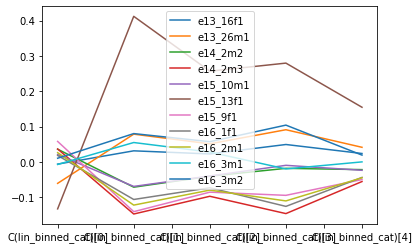

In [91]:
rand_ef.plot()

In [78]:
res.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Mixed Linear Model Regression Results
==========================================================================================
Model:                        MixedLM            Dependent Variable:            sw_on     
No. Observations:             5470               Method:                        REML      
No. Groups:                   11                 Scale:                         0.4132    
Min. group size:              90                 Log-Likelihood:                -5383.6857
Max. group size:              860                Converged:                     Yes       
Mean group size:              497.3                                                       
------------------------------------------------------------------------------------------
                                                Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------------------------
Intercept                                       -0.054    0.036 -1.480 0.139 -0.125  0.017
C(lin_binned_cat)[T.1]                           0.231    0.060  3.854 0.000  0.114  0.349
C(lin_binned_cat)[T.2]                           0.223    0.048  4.627 0.000  0.128  0.317
C(lin_binned_cat)[T.3]                           0.321    0.054  5.951 0.000  0.216  0.427
C(lin_binned_cat)[T.4]                           0.120    0.045  2.663 0.008  0.032  0.208
n_field                                          0.003    0.000  6.856 0.000  0.002  0.004
trial_z                                         -0.059    0.010 -5.862 0.000 -0.079 -0.040
C(lin_binned_cat)[0] Var                         0.003    0.006                           
C(lin_binned_cat)[0] x C(lin_binned_cat)[1] Cov -0.004    0.008                           
C(lin_binned_cat)[1] Var                         0.018    0.015                           
C(lin_binned_cat)[0] x C(lin_binned_cat)[2] Cov -0.002                                    
C(lin_binned_cat)[1] x C(lin_binned_cat)[2] Cov  0.011    0.006                           
C(lin_binned_cat)[2] Var                         0.007    0.002                           
C(lin_binned_cat)[0] x C(lin_binned_cat)[3] Cov -0.003    0.007                           
C(lin_binned_cat)[1] x C(lin_binned_cat)[3] Cov  0.012    0.011                           
C(lin_binned_cat)[2] x C(lin_binned_cat)[3] Cov  0.008    0.006                           
C(lin_binned_cat)[3] Var                         0.012    0.011                           
C(lin_binned_cat)[0] x C(lin_binned_cat)[4] Cov -0.002                                    
C(lin_binned_cat)[1] x C(lin_binned_cat)[4] Cov  0.006                                    
C(lin_binned_cat)[2] x C(lin_binned_cat)[4] Cov  0.004    0.002                           
C(lin_binned_cat)[3] x C(lin_binned_cat)[4] Cov  0.005                                    
C(lin_binned_cat)[4] Var                         0.004                                    
==========================================================================================

"""

# leave one animal/session out for the error

In [94]:
var_per_trial_pos_all.index.get_level_values(0).unique()

Index(['e13_16f1', 'e13_26m1', 'e14_2m2', 'e14_2m3', 'e15_10m1', 'e15_13f1',
       'e15_9f1', 'e16_1f1', 'e16_2m1', 'e16_3m1', 'e16_3m2'],
      dtype='object')

In [105]:
%%time
X = var_per_trial_pos_all
ani_l = var_per_trial_pos_all.index.get_level_values(0).unique()
params_allfit=[]
y_key='sw_on'
formula = f'{y_key}~C(animal)+C(lin_binned_cat)+n_field+trial_z+speed_z'
for ani in ani_l:
    ani_l_left=ani_l[ani_l!=ani]
    X_left = X.loc[ani_l_left]
    model=smf.glm(formula=formula,data=X_left,family=sm.families.Poisson(sm.families.links.Log()))
    res=model.fit()
    params_allfit.append(res.params)
params_allfit = pd.concat(params_allfit,axis=1)

CPU times: user 1.6 s, sys: 995 ms, total: 2.6 s
Wall time: 682 ms


In [110]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  sw_on   No. Observations:                 5470
Model:                            GLM   Df Residuals:                     5452
Model Family:                 Poisson   Df Model:                           17
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3460.6
Date:                Tue, 20 Jun 2023   Deviance:                       4308.1
Time:                        15:17:41   Pearson chi2:                 6.51e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.1957
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -2.2877      0.119    -19.295      0.000      -2.520      -2.055
C(animal)[T.e13_26m1]      0.1223      0.100      1.218      0.223      -0.074       0.319
C(animal)[T.e14_2m2]      -0.2810      0.178     -1.583      0.113      -0.629       0.067
C(animal)[T.e14_2m3]      -0.8935      0.134     -6.681      0.000      -1.156      -0.631
C(animal)[T.e15_10m1]     -0.4583      0.143     -3.211      0.001      -0.738      -0.179
C(animal)[T.e15_13f1]      0.5007      0.101      4.937      0.000       0.302       0.699
C(animal)[T.e15_9f1]      -0.6116      0.130     -4.712      0.000      -0.866      -0.357
C(animal)[T.e16_1f1]      -1.0143      0.162     -6.278      0.000      -1.331      -0.698
C(animal)[T.e16_2m1]      -1.3585      0.414     -3.278      0.001      -2.171      -0.546
C(animal)[T.e16_3m1]      -0.0407      0.120     -0.340      0.734      -0.276       0.194
C(animal)[T.e16_3m2]       0.1373      0.100      1.378      0.168      -0.058       0.333
C(lin_binned_cat)[T.1]     0.9253      0.114      8.090      0.000       0.701       1.150
C(lin_binned_cat)[T.2]     1.1093      0.101     10.968      0.000       0.911       1.308
C(lin_binned_cat)[T.3]     1.4110      0.100     14.132      0.000       1.215       1.607
C(lin_binned_cat)[T.4]     0.2952      0.130      2.265      0.024       0.040       0.551
n_field                    0.0041      0.001      5.233      0.000       0.003       0.006
trial_z                   -0.1942      0.028     -6.826      0.000      -0.250      -0.138
speed_z                    0.1474      0.031      4.702      0.000       0.086       0.209
==========================================================================================
"""

In [106]:
params_allfit 

,0,1,2,3,4,5,6,7,8,9,10
Intercept,-2.052573,-2.332222,-2.309464,-2.331869,-2.305465,-2.152847,-2.354637,-2.260090,-2.283091,-2.304377,-2.333188
C(animal)[T.e14_2m2],-0.453757,-0.274057,NaN,-0.276271,-0.278644,-0.280028,-0.275468,-0.280957,-0.280841,-0.277988,-0.290268
C(animal)[T.e14_2m3],-1.079730,-0.877921,-0.890679,NaN,-0.885681,-0.895119,-0.878467,-0.896048,-0.894195,-0.890493,-0.898666
C(animal)[T.e15_10m1],-0.639736,-0.445354,-0.455735,-0.456049,NaN,-0.459096,-0.446026,-0.459622,-0.458631,-0.456873,-0.462593
C(animal)[T.e15_13f1],0.382713,0.464311,0.492558,0.493181,0.483446,NaN,0.465266,0.503475,0.501366,0.499542,0.511215
C(animal)[T.e15_9f1],-0.791982,-0.600235,-0.610150,-0.609295,-0.605984,-0.610086,NaN,-0.612863,-0.611924,-0.608720,-0.617636
C(animal)[T.e16_1f1],-1.205033,-0.995130,-1.010358,-1.011272,-1.004717,-1.016010,-0.995603,NaN,-1.014934,-1.011788,-1.020110
C(animal)[T.e16_2m1],-1.543025,-1.338855,-1.355362,-1.354340,-1.349761,-1.363683,-1.340706,-1.360115,NaN,-1.359288,-1.366933
C(animal)[T.e16_3m1],-0.200405,-0.043589,-0.042208,-0.040264,-0.041776,-0.041171,-0.043325,-0.040562,-0.040625,NaN,-0.042221
C(animal)[T.e16_3m2],-0.022841,0.133977,0.135467,0.137837,0.136849,0.138859,0.133315,0.136908,0.137288,0.139607,NaN


# visualization: n sw vs n field, seperated by arm

In [69]:
reload(bas)
var_per_trial_pos_all = bas.prep_regression(spk_beh_df_all,all_fields_recombined_all,all_sw_d_all,var_bin_d={'lin_binned':np.array([0,15,74,111,185,202,222])/2.2},combine_first_last_section=True)
# var_per_trial_pos_all = bas.prep_regression(spk_beh_df_all,all_fields_recombined_all,all_sw_d_all,combine_first_last_section=False)

/mnt/home/szheng/projects/place_variability/code/behavior_and_switching.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[k_cat] = pd.cut(df[k],val,retbins=False,labels=False,include_lowest=True)


In [ ]:
y_key =  'sw_on'
n_sw_per_pos=var_per_trial_pos_all.set_index('lin_binned_cat',append=True).groupby(level=(0,1,2,3))[y_key].sum()

n_field_per_pos=var_per_trial_pos_all.set_index('lin_binned_cat',append=True).groupby(level=(0,1,2,3))['n_field'].mean()

var_per_pos = pd.concat({y_key:n_sw_per_pos,'n_field':n_field_per_pos},axis=1)

var_per_pos=var_per_pos.reset_index('lin_binned_cat')
var_per_pos['lin_binned_cat'] = var_per_pos['lin_binned_cat'].astype('category')

In [ ]:
data_toplot=var_per_pos.loc[ani_l]
ax=sns.scatterplot(data=data_toplot,x='n_field',y=y_key,hue='lin_binned_cat',linewidth=0)

model_null=smf.ols(formula=f"{y_key}~n_field-1",data=data_toplot)
res_null = model_null.fit()
slope_null = res_null.params['n_field']
xmin,xmax = 0,var_per_pos['n_field'].max()
ymin,ymax = 0, slope_null * xmax

ax.plot([xmin,xmax],[ymin,ymax],color='k')
plt.legend(loc='best')

In [ ]:
ani = ani_l[1]
data_toplot=var_per_pos.loc[ani]
data_toplot['lin_binned_cat'] = data_toplot['lin_binned_cat'].astype('category')
ax=sns.scatterplot(data=data_toplot,x='n_field',y=y_key,hue='lin_binned_cat',linewidth=0)


model_null=smf.ols(formula=f"{y_key}~n_field-1",data=data_toplot)
res_null = model_null.fit()
slope_null = res_null.params['n_field']

xmin,xmax = 0,data_toplot['n_field'].max()
ymin,ymax = 0, slope_null * xmax
ax.plot([xmin,xmax],[ymin,ymax],color='k')
plt.legend(loc='best')

In [ ]:
ani = ani_l[0]
data_toplot=var_per_trial_pos_all.loc[ani]
data_toplot['lin_binned_cat'] = data_toplot['lin_binned_cat'].astype('category')
ax=sns.scatterplot(data=data_toplot,x='n_field',y=y_key,hue='lin_binned_cat',linewidth=0)


model_null=smf.ols(formula=f"{y_key}~n_field-1",data=data_toplot)
res_null = model_null.fit()
slope_null = res_null.params['n_field']

xmin,xmax = 0,data_toplot['n_field'].max()
ymin,ymax = 0, slope_null * xmax
ax.plot([xmin,xmax],[ymin,ymax],color='k')
plt.legend(loc='best')

In [ ]:
gpb = var_per_pos.groupby('lin_binned_cat')
fig,ax=plt.subplots()
for k,val in gpb:
    ax.scatter(val['n_field'],val[y_key],label=k)
xmin,xmax = 0,var_per_pos['n_field'].max()
ymin,ymax = 0, slope_null * xmax
ax.plot([xmin,xmax],[ymin,ymax],color='k')
plt.legend(loc='best')